# Ch 0.1.2 Play prompt_embeds

# Part 0: Setup

In [1]:
# Install diffusers and parediffusers
!pip install transformers diffusers accelerate -U
!pip install -e ..

Obtaining file:///
ERROR: file:/// does not appear to be a Python project: neither 'setup.py' nor 'pyproject.toml' found.


In [2]:
import torch
from parediffusers import PareDiffusionPipeline

device = torch.device("cuda")
dtype = torch.float16
model_name = "stabilityai/stable-diffusion-2"
width = 512
height = 512
num_inference_steps = 50
guidance_scale = 7.5

pare_pipe = PareDiffusionPipeline.from_pretrained(model_name, device=device, dtype=dtype)

/usr/local/lib/python3.10/dist-packages/diffusers/configuration_utils.py:244: FutureWarning: It is deprecated to pass a pretrained model name or path to `from_config`.If you were trying to load a scheduler, please use <class 'diffusers.schedulers.scheduling_ddim.DDIMScheduler'>.from_pretrained(...) instead. Otherwise, please make sure to pass a configuration dictionary instead. This functionality will be removed in v1.0.0.
  deprecate("config-passed-as-path", "1.0.0", deprecation_message, standard_warn=False)


## Part 1: Get cat prompt embes.

tensor([[-0.3135, -0.4475, -0.0082,  ...,  0.2544, -0.0326, -0.2959],
        [ 0.7637, -1.2773, -0.6064,  ...,  0.6685, -2.3223, -0.1416],
        [-0.9751, -1.1025, -0.6084,  ..., -0.0643, -0.0245, -0.3987],
        ...,
        [ 0.2671, -1.5498,  0.4026,  ..., -0.0592, -0.2308,  0.0904],
        [ 0.3345, -1.5332,  0.4236,  ..., -0.3103, -0.2810,  0.1937],
        [ 0.7334, -2.2129, -0.0186,  ..., -0.1227,  0.0277,  0.4409]],
       device='cuda:0', dtype=torch.float16, grad_fn=<SelectBackward0>)


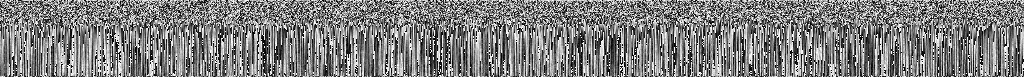

In [3]:
import matplotlib.pyplot as plt

prompt = "bright noon landscape photo, 4k, high detail, beauty, 16k"
pare_pipe(prompt)
morning_prompt_embeds = pare_pipe.encode_prompt(prompt)

# morning_prompt_embeds[0] is negative prompt, so display only positive prompt: morning_prompt_embeds[1].
print(morning_prompt_embeds[1])
display(pare_pipe.tensor_to_image(morning_prompt_embeds[1]))

## Part 2: Get dog prompt embes.

tensor([[-3.1348e-01, -4.4751e-01, -8.1558e-03,  ...,  2.5439e-01,
         -3.2593e-02, -2.9590e-01],
        [-2.2449e-01, -2.4976e-01, -4.5239e-01,  ..., -5.4688e-01,
         -1.4424e+00, -6.8799e-01],
        [-1.3940e-01, -4.9194e-01,  7.3389e-01,  ...,  1.2920e+00,
         -8.8574e-01, -6.6406e-01],
        ...,
        [ 3.8013e-01, -1.2939e+00,  5.4785e-01,  ..., -1.8320e-03,
         -5.8105e-02,  1.1627e-01],
        [ 4.4995e-01, -1.2793e+00,  5.6885e-01,  ..., -2.6001e-01,
         -1.1743e-01,  2.3425e-01],
        [ 8.1836e-01, -2.0312e+00,  1.4014e-01,  ..., -2.2797e-02,
          2.4963e-01,  3.6938e-01]], device='cuda:0', dtype=torch.float16,
       grad_fn=<SelectBackward0>)


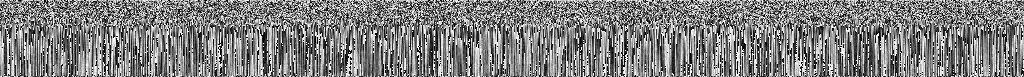

In [4]:
prompt = "dark night landscape photo, 4k, high detail, beauty, 16k"
night_prompt_embeds = pare_pipe.encode_prompt(prompt)
print(night_prompt_embeds[1])
display(pare_pipe.tensor_to_image(night_prompt_embeds[1]))

## Part 3: Get Diff prompt embes.

tensor([[ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [-0.9883,  1.0273,  0.1541,  ..., -1.2148,  0.8799, -0.5464],
        [ 0.8359,  0.6104,  1.3418,  ...,  1.3564, -0.8613, -0.2654],
        ...,
        [ 0.1130,  0.2559,  0.1453,  ...,  0.0574,  0.1727,  0.0259],
        [ 0.1155,  0.2539,  0.1453,  ...,  0.0503,  0.1636,  0.0405],
        [ 0.0850,  0.1816,  0.1588,  ...,  0.0999,  0.2219, -0.0715]],
       device='cuda:0', dtype=torch.float16, grad_fn=<SelectBackward0>)


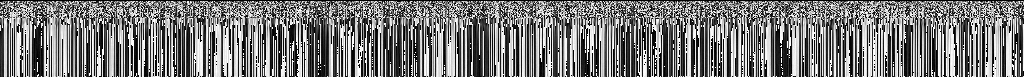

In [5]:
diff_prompt_embeds = night_prompt_embeds - morning_prompt_embeds
print(diff_prompt_embeds[1])
display(pare_pipe.tensor_to_image(diff_prompt_embeds[1]))

## Part 4: Generate Images

Morning 100% + Night 0%


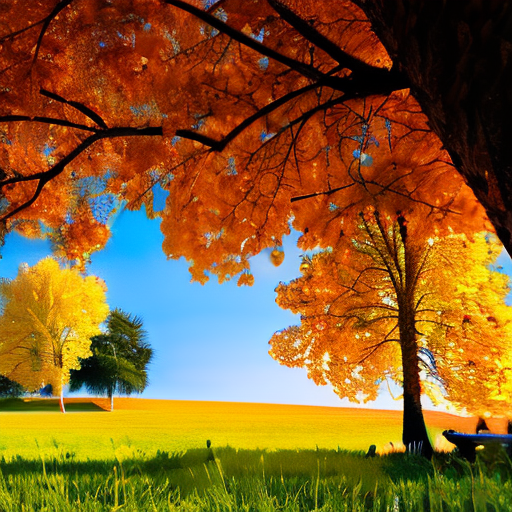

Morning 90% + Night 10%


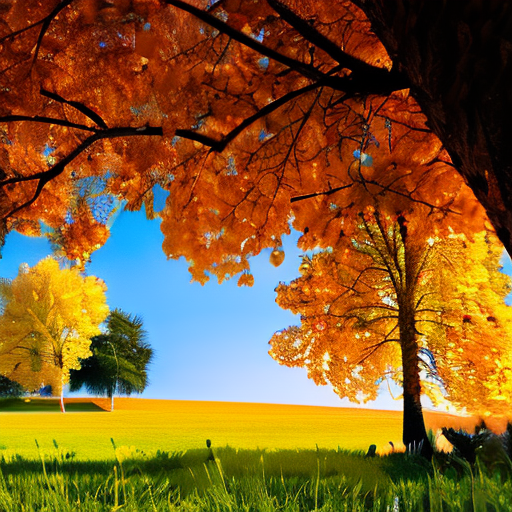

Morning 80% + Night 20%


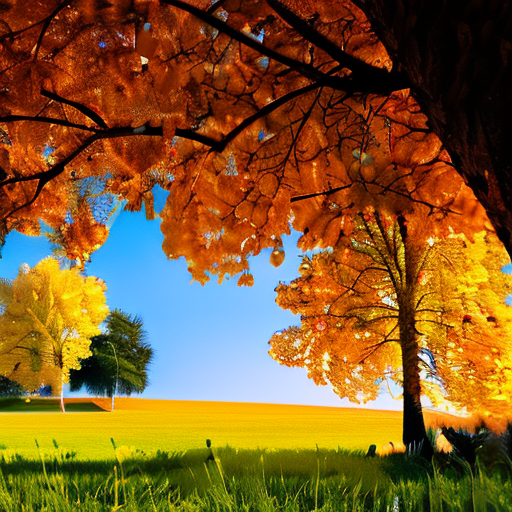

Morning 70% + Night 30%


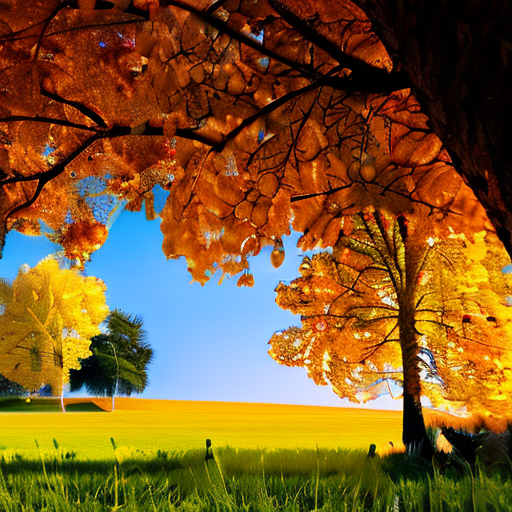

Morning 60% + Night 40%


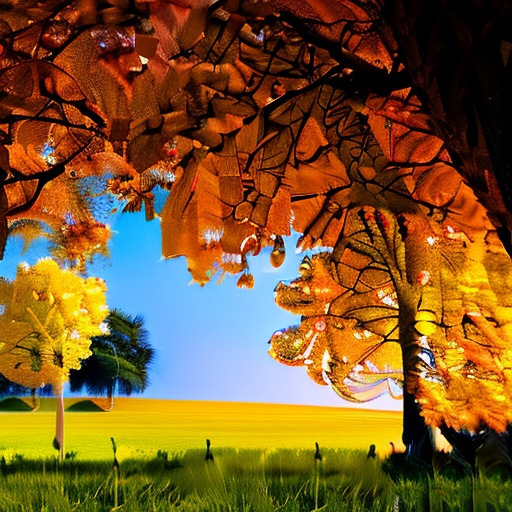

Morning 50% + Night 50%


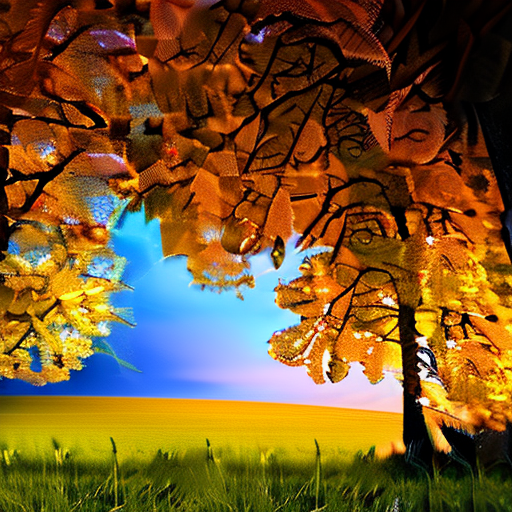

Morning 40% + Night 60%


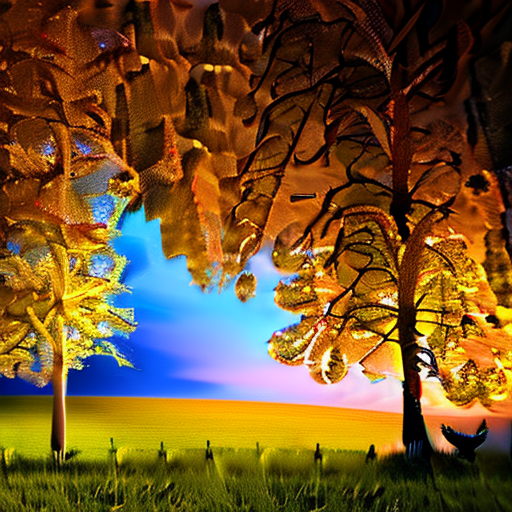

Morning 30% + Night 70%


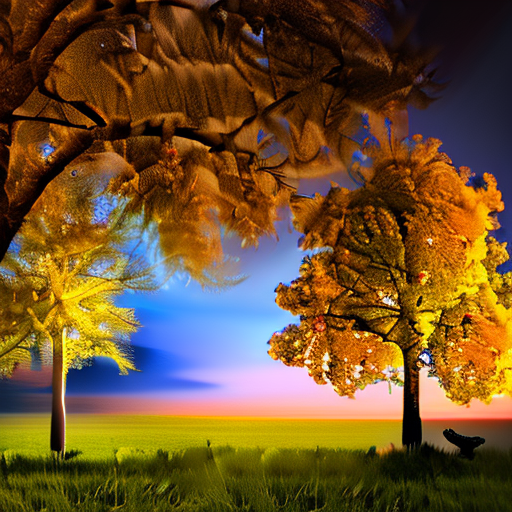

Morning 20% + Night 80%


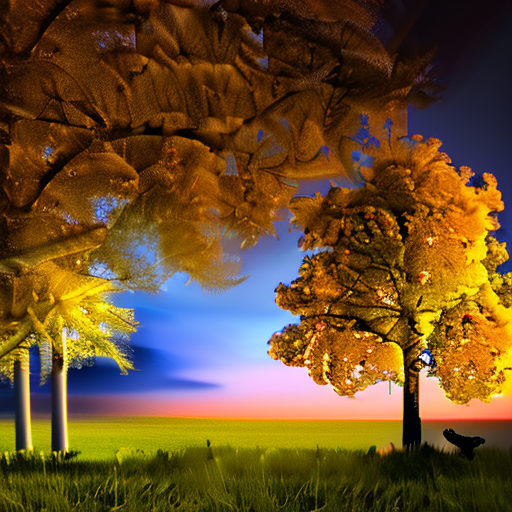

Morning 10% + Night 90%


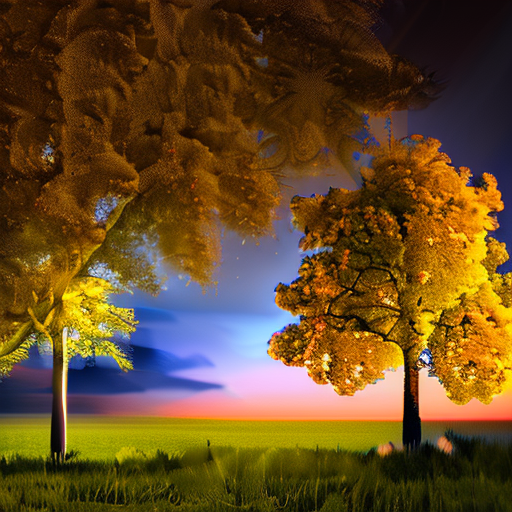

Morning 0% + Night 100%


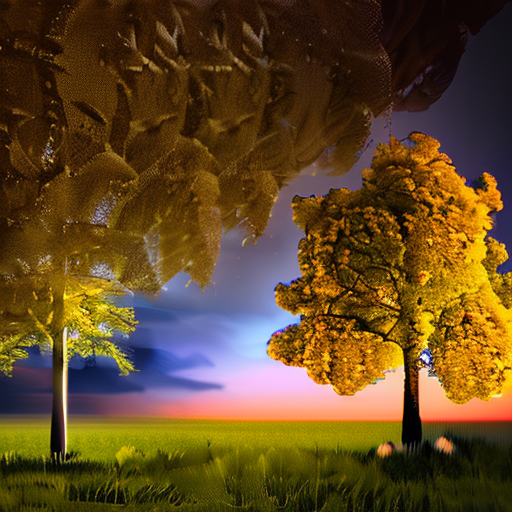

In [6]:
original_latents = pare_pipe.get_latent(width, height).unsqueeze(dim=0).to(device, dtype)

for i in range(11):
	print(f"Morning {(10-i)*10}% + Night {i*10}%")
	prompt_embeds = morning_prompt_embeds + (diff_prompt_embeds * i * 0.1)

	latents = original_latents.clone().detach()
	latents = pare_pipe.denoise(latents, prompt_embeds, num_inference_steps, guidance_scale)
	image = pare_pipe.vae_decode(latents)
	display(image)